In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1=pd.read_csv("D:\Python\Project\Feb2022.csv")
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Sl.No.,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,NaN,12.0,NaN
Factor,Schedules(As on last day),Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),Vehicle Utilisation (in kms),Gross kms (in lakh),HSD consumed (in lakh),KMPL (HSD),No.of Break downs,Rate of BD per 10000 km,No. of Accidents,Rate of Accdt per 100000 km
Bengaluru Central,595.0,733.0,66.1,5.8,57.2,59.54,436.0,61.65,13.11,4.7,7.0,0.01,8.0,0.13
Ramanagara,457.0,494.0,87.6,3.4,40.52,39.36,325.0,40.53,7.94,5.11,8.0,0.02,2.0,0.05
Tumkuru,568.0,617.0,87.7,5.2,54.76,52.68,349.0,54.05,10.15,5.32,13.0,0.02,2.0,0.04


In [4]:

D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held (As on last day)','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns
D1=D1[:16]
D1

Factor,Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id
Bengaluru Central,733.0,66.1,5.8,57.2,59.54,1
Ramanagara,494.0,87.6,3.4,40.52,39.36,2
Tumkuru,617.0,87.7,5.2,54.76,52.68,3
Kolara,539.0,90.0,4.8,48.09,47.71,4
Chikkaballapura,564.0,90.2,2.7,51.48,51.06,5
Mysore City,431.0,79.4,3.3,21.29,20.82,6
Mysore Rural,688.0,83.3,6.0,61.48,61.13,7
Mandya,447.0,89.4,4.3,42.57,39.95,8
Chamarajanagar,509.0,89.4,5.3,45.05,43.72,9
Hassan,547.0,93.1,5.7,52.77,51.09,10


In [5]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')

FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Fleet Held (As on last day)']
EffPassDensity=np.multiply(FleetUtilisation,FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [6]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Bengaluru Central to Chitradurga
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Fleet Held (As on last day)     16 non-null     object
 1   Fleet Utilisation (%)           16 non-null     object
 2   % off road  vehicles            16 non-null     object
 3   Schedule kms (in lakh)          16 non-null     object
 4   Effective Kilometers (in lakh)  16 non-null     object
 5   City_Id                         16 non-null     int64 
 6   EffPassDensity                  16 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.0+ KB


In [7]:
D1.head()

Factor,Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,733.0,66.1,5.8,57.2,59.54,1,484.513
Ramanagara,494.0,87.6,3.4,40.52,39.36,2,432.744
Tumkuru,617.0,87.7,5.2,54.76,52.68,3,541.109
Kolara,539.0,90.0,4.8,48.09,47.71,4,485.1
Chikkaballapura,564.0,90.2,2.7,51.48,51.06,5,508.728


In [8]:
D1.tail()

Factor,Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Mangaluru,569.0,84.5,6.5,50.81,50.38,12,480.805
Puttur,542.0,87.2,4.2,43.66,42.48,13,472.624
Davanagere,358.0,94.2,4.3,32.77,32.96,14,337.236
Shivamoga,352.0,86.6,4.1,31.74,31.82,15,304.832
Chitradurga,303.0,90.7,8.5,28.74,27.42,16,274.821


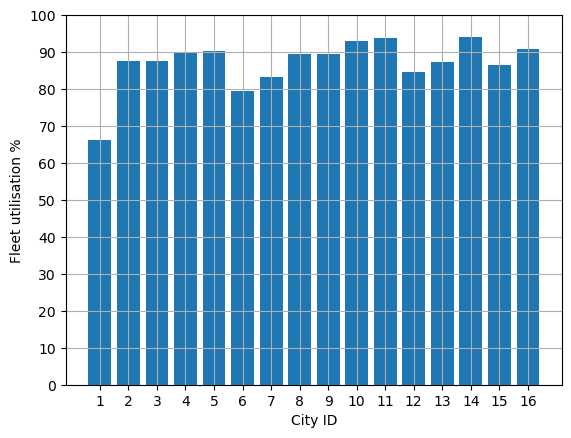

In [9]:
X=D1['City_Id']
Y=D1['Fleet Utilisation (%)']
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Fleet utilisation %')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [10]:
D1

Factor,Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,733.0,66.1,5.8,57.2,59.54,1,484.513
Ramanagara,494.0,87.6,3.4,40.52,39.36,2,432.744
Tumkuru,617.0,87.7,5.2,54.76,52.68,3,541.109
Kolara,539.0,90.0,4.8,48.09,47.71,4,485.1
Chikkaballapura,564.0,90.2,2.7,51.48,51.06,5,508.728
Mysore City,431.0,79.4,3.3,21.29,20.82,6,342.214
Mysore Rural,688.0,83.3,6.0,61.48,61.13,7,573.104
Mandya,447.0,89.4,4.3,42.57,39.95,8,399.618
Chamarajanagar,509.0,89.4,5.3,45.05,43.72,9,455.046
Hassan,547.0,93.1,5.7,52.77,51.09,10,509.257


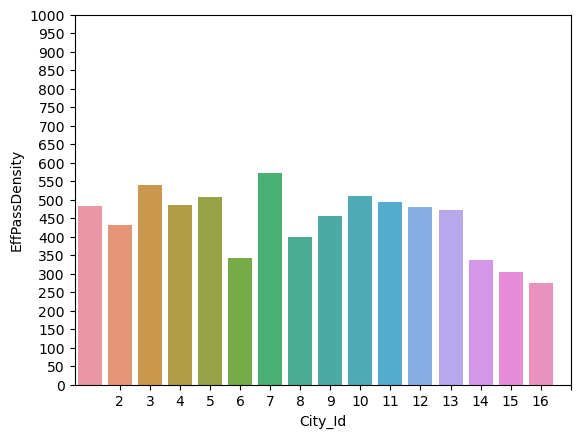

In [11]:
X=D1['City_Id']
Y=D1['EffPassDensity']
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

### Descriptive Statistic Analysis
Mean of EffectivePassengerDensity = meanEPD

In [12]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of Effective Passenger Density:',meanEPD)

D1['EffPassDensity'].values


Mean of Effective Passenger Density: 443.41331249999996


array([484.5129999999999, 432.744, 541.109, 485.1, 508.728, 342.214,
       573.1039999999999, 399.61800000000005, 455.04600000000005,
       509.25699999999995, 492.862, 480.805, 472.624, 337.23600000000005,
       304.832, 274.821], dtype=object)

In [13]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 7626.620962762496
Standard deviation: 87.33052709541204


In [14]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'EffPassDensity':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,EffPassDensity,Mean Variations
0,1,484.513,41.099687
1,2,432.744,-10.669312
2,3,541.109,97.695688
3,4,485.1,41.686688
4,5,508.728,65.314688
5,6,342.214,-101.199312
6,7,573.104,129.690687
7,8,399.618,-43.795312
8,9,455.046,11.632688
9,10,509.257,65.843687


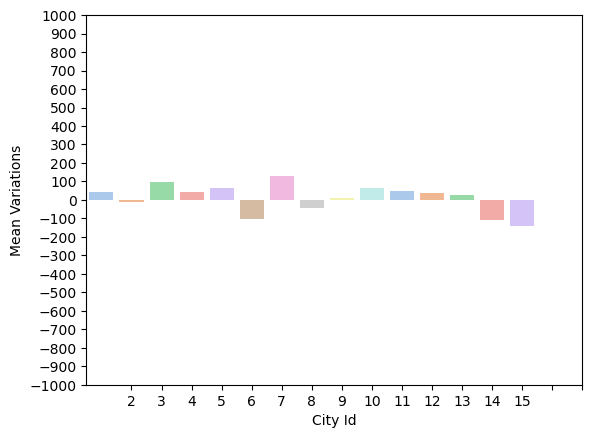

In [15]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\abhib\AppData\Local\Temp\ipykernel_23304\4241719585.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: ylabel='Density'>

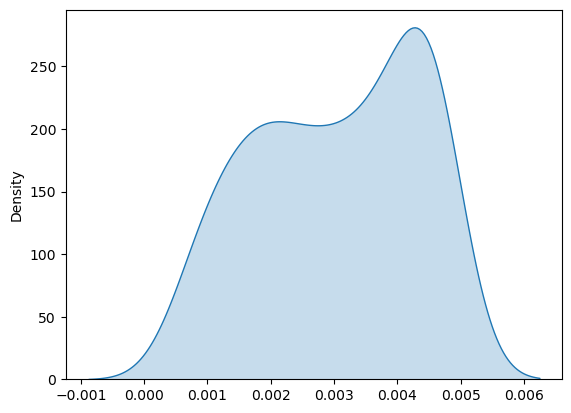

In [16]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['EffPassDensity'])
sd = np.std(D1['EffPassDensity'])
sorted_data = D1['EffPassDensity'].sort_values()
X=np.linspace(D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)



In [17]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Factor,Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,16.0,16.0,16.0,16.0,16.00,16.000000,16.000
unique,16.0,15.0,15.0,16.0,16.00,NaN,16.000
top,733.0,89.4,4.3,57.2,59.54,NaN,484.513
freq,1.0,2.0,2.0,1.0,1.00,NaN,1.000
mean,NaN,NaN,NaN,NaN,NaN,8.500000,NaN
std,NaN,NaN,NaN,NaN,NaN,4.760952,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.750000,NaN
50%,NaN,NaN,NaN,NaN,NaN,8.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,12.250000,NaN


In [18]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%':
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

Stats

Factor,Fleet Held (As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
unique,16.000000,15.000000,15.000000,16.000000,16.000000,NaN,16.000000
top,733.000000,89.400000,4.300000,57.200000,59.540000,NaN,484.513000
freq,1.000000,2.000000,2.000000,1.000000,1.000000,NaN,1.000000
mean,513.687500,87.068750,4.868750,44.611875,43.877500,8.500000,443.413312
std,116.594865,6.801345,1.440703,11.174407,11.320839,4.760952,87.330527
min,303.000000,66.100000,2.700000,21.290000,20.820000,1.000000,274.821000
25%,443.000000,86.075000,4.025000,38.582500,37.760000,4.750000,385.267000
50%,532.500000,88.550000,4.550000,46.570000,45.715000,8.500000,476.714500
75%,565.250000,90.325000,5.725000,51.802500,51.067500,12.250000,496.828500


<class 'float'>


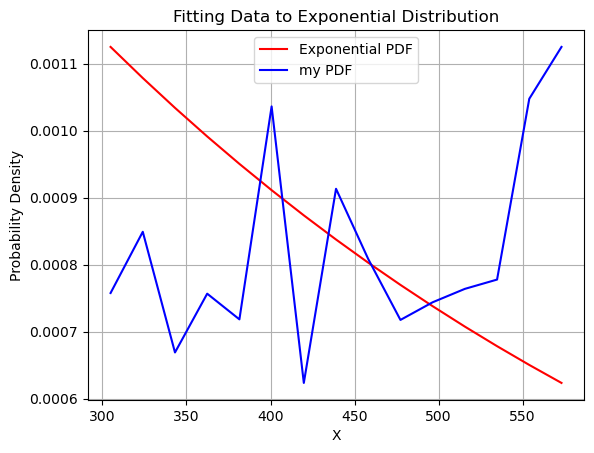

[0.00112496 0.00107853 0.00103402 0.00099135 0.00095043 0.00091121
 0.0008736  0.00083754 0.00080298 0.00076984 0.00073807 0.00070761
 0.0006784  0.0006504  0.00062356] [0.00075771 0.00084909 0.00066902 0.00075673 0.00071841 0.00103617
 0.00062356 0.00091326 0.00080844 0.00071757 0.00074392 0.00076391
 0.00077778 0.00104757 0.00112496]


In [19]:
from scipy.stats import expon

# Given data
data = D1['EffPassDensity'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [20]:
import statistics as stats
from scipy.stats import norm 
import scipy.stats
Xfactor=D1['EffPassDensity'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])


15 15
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.8996094517558868


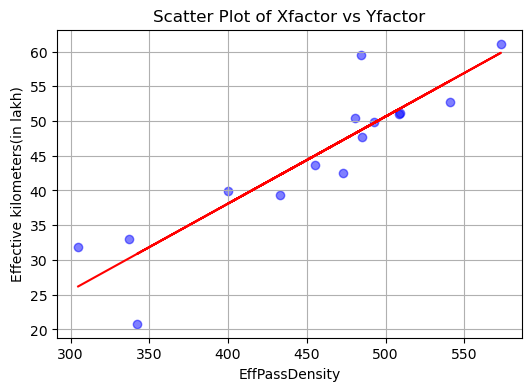

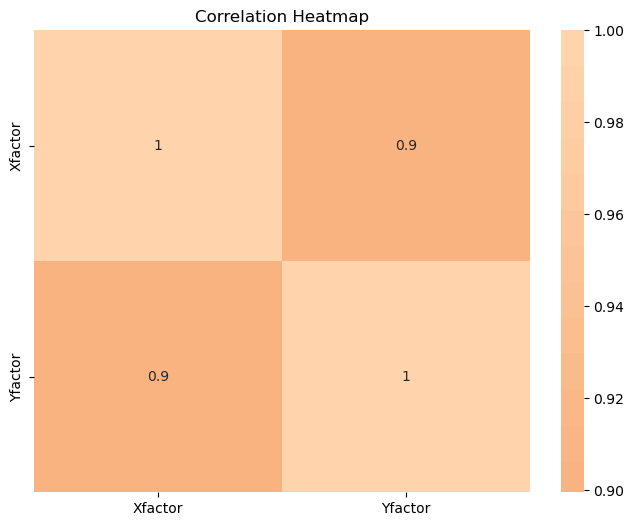

In [21]:
data = {
    'Xfactor': D1['EffPassDensity'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('EffPassDensity')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True,center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


In [22]:
from scipy.stats import skew

data_skewness = skew(D1['EffPassDensity'])
print("Skewness:", data_skewness)


ValueError: data type <class 'numpy.object_'> not inexact

In [31]:
DF={'Feb2022':[D1['EffPassDensity'].count(),D1['EffPassDensity'].mean(),D1['EffPassDensity'].std(),D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),R[0]]}
Df=pd.DataFrame(DF)
Df=Df.T
Df
Df.to_csv("Monthly.csv",mode="a",index=True,header=False)
data=pd.read_csv("Monthly.csv")
data

,Unnamed: 0,0,1,2,3,4,5
0,Feb2022,16.0,443.413313,87.330527,274.821,573.104,0.899609
1,Feb2022,16.0,443.413313,87.330527,274.821,573.104,0.899609
2,Feb2022,16.0,443.413313,87.330527,274.821,573.104,0.899609
